<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/API_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

API Lab - Maggie Crowner

*Question 1*

https://www.saferproducts.gov/RestWebServices/Recall?format=json&Injury=Death

Practiced more queries in my web browser.

*Question 2*

In [10]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Exercise'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

*Question 3*

,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,...,Manufacturers,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions
0,7832,16247,2016-08-23T00:00:00,"This recall involves ""Step-iT"" activity wristb...",https://www.cpsc.gov/Recalls/2016/McDonalds-Re...,McDonald’s Recalls “Step-iT” Activity Wristban...,McDonald's at 800-244-6227 from 7 a.m. to 7 p....,2016-08-23T00:00:00,"[{'Name': 'Step-iT Activity Wristbands', 'Desc...",[{'URL': 'http://healthycanadians.gc.ca/recall...,...,[],[{'Name': 'Distributed exclusively by McDonald...,[],"[""McDonald's Corp., of Oakbrook, Ill.""]",None,['China'],[],[{'Name': 'The recalled wristbands can cause s...,[{'Name': 'Consumers should immediately take t...,['Replace']
1,6724,16742,2016-05-10T00:00:00,This recall involves the Olympic Decline free ...,https://www.cpsc.gov/Recalls/2016/Cybex-Intern...,Cybex International Recalls Decline Free Weigh...,Cybex toll-free at 888-462-9239 from 8 a.m. to...,2016-05-10T00:00:00,"[{'Name': 'Decline free weight benches', 'Desc...",[],...,"[{'Name': 'Cybex International, Inc. of Medway...",[{'Name': 'Cybex direct sales force or its dis...,[],nan,None,['United States'],[],[{'Name': 'The frame on the bench can collapse...,[{'Name': 'Consumers should immediately stop u...,['Replace']
2,6488,15749,2015-08-25T00:00:00,This recall involves four models of exercise m...,https://www.cpsc.gov/Recalls/2015/Cybex-Intern...,Cybex International Recalls Arm Curl Machines ...,Cybex International toll-free at 888-678-3846 ...,2015-08-25T00:00:00,"[{'Name': 'Arm Curl Machines', 'Description': ...",[],...,"[{'Name': 'Cybex International, Inc., of Medwa...",[{'Name': 'Cybex or its distributors directly ...,[],nan,None,['United States'],[],[{'Name': 'The swivel handles can break off fr...,[{'Name': 'Consumers should immediately stop u...,['Repair']
3,6420,15735,2015-06-16T00:00:00,This recall involves the Rogue Fitness Mobilit...,https://www.cpsc.gov/Recalls/2015/Coulter-Vent...,Coulter Ventures Recalls MobilityWOD Door Anch...,Coulter toll-free at (844) 216-3846 from 9 a.m...,2015-06-16T00:00:00,"[{'Name': 'MobilityWOD Door Anchor', 'Descript...",[],...,[],[{'Name': 'Rogue Fitness websites: www.roguefi...,[],"['Coulter Ventures LLC, dba Rogue Fitness, of ...",None,['China'],[],[{'Name': 'The nylon strap can pull out from t...,[{'Name': 'Consumers should immediately stop u...,['Refund']
4,6398,15140,2015-05-20T00:00:00,This recall involves Valor Fitness BF-38 Flat/...,https://www.cpsc.gov/Recalls/2015/Valor-Athlet...,Valor Athletics Recalls Olympic Weight Bench d...,Valor Fitness toll-free at (844) 277-1641 Mond...,2015-05-20T00:00:00,"[{'Name': 'Weight bench', 'Description': '', '...",[],...,[],[{'Name': 'Valorathleticsinc.com and Valorfitn...,"[{'Name': 'Valor Athletics Inc., of St. Peters...",nan,None,['China'],[],[{'Name': 'The weld joining the front leg to t...,[{'Name': 'Consumers should immediately stop u...,['Repair']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,4958,90117,1990-06-28T00:00:00,"June 28, 1990 Release # 90-117 Spring Exercise...",https://www.cpsc.gov/Recalls/1990/Spring-Exerc...,"Spring Exercisers Recalled; Breaking Springs, ...",None,2015-01-16T00:00:00,[{'Name': 'New Gym Stomach Eliminator exercise...,[],...,"[{'Name': 'Brevattato', 'CompanyID': ''}, {'Na...",[],[],nan,None,['Italy'],[],"[{'Name': 'Laceration', 'HazardType': '', 'Haz...",[],nan
87,4957,90115,1990-06-21T00:00:00,"June 21, 1990 Release # 90-115 Retrofit Progra...",https://www.cpsc.gov/Recalls/1990/Retrofit-Pro...,Retrofit Program Announced For Spring Exercisers,None,2015-01-15T00:00:00,[{'Name': 'Rowing Action Exerciser spring exer...,[],...,"[{'Name': 'Dynamic Classics', 'CompanyID': ''}]",[],[],nan,None,nan,[],[],[],nan
88,4870,89091,1989-09-26T00:00:00,Stair Climber Exercise Device Repair by Precor...,https://www.cpsc.gov/

RemedyOptions
nan                               66
['Repair']                         9
['Replace']                        8
['Refund']                         5
['Replace', 'Refund']              1
['Refund', 'Repair']               1
['New Instructions', 'Repair']     1
Name: count, dtype: int64


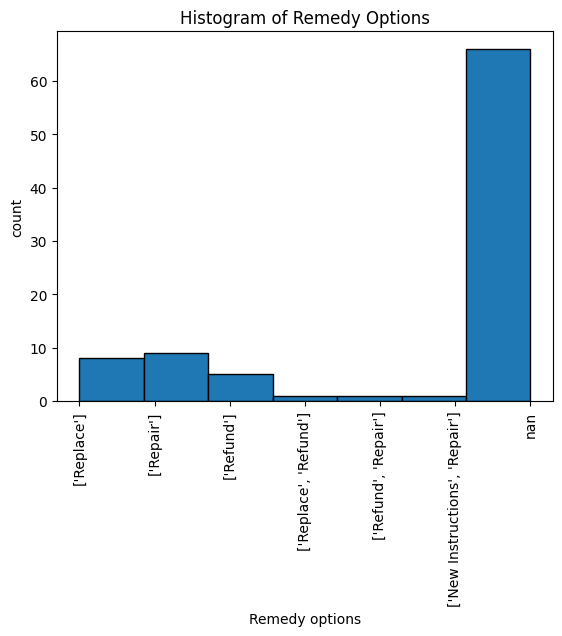

In [17]:
import pandas as pd
import numpy as np

def flatten(df, variable, heading):
  temp = df[variable]
  clean_values = []
  for i in range(len(temp)):
      if len(temp[i])>0:
          values = []
          for j in range(len(temp[i])):
              values.append(temp[i][j][heading])
          clean_values.append(values)
      else:
          clean_values.append(np.nan)
  df[variable] = clean_values
  df[variable] = df[variable].astype(str)

df = pd.DataFrame.from_dict(data)
flatten(df=df, variable='RemedyOptions', heading='Option')
flatten(df=df, variable='ManufacturerCountries', heading='Country')
flatten(df=df, variable='Distributors', heading='Name')
display(df)

import matplotlib.pyplot as plt

print(df['RemedyOptions'].value_counts())
plt.hist(df['RemedyOptions'], density=False, bins=7, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Remedy options')
plt.ylabel('count')
plt.title('Histogram of Remedy Options')
plt.show()

*Question 5*

,period,msn,seriesDescription,value,unit
0,2024,CCIEKUS,Coal Coke Imports and Exports Heat Content in ...,24.8,Million Btu per Short Ton
1,2024,WCDOKUS,Waste Coal Supplied Heat Content in Million Bt...,11.268,Million Btu per Short Ton
2,2024,RPIMKUS,Petroleum Products Imports Heat Content in Mil...,5.472,Million Btu per Barrel
3,2024,RPEXKUS,Petroleum Products Exports Heat Content in Mil...,4.806,Million Btu per Barrel
4,2024,PCTCKUS,Petroleum Coke Consumption Heat Content in Mil...,6.151,Million Btu per Barrel
...,...,...,...,...,...
4995,2019,ARTCBUS,Asphalt and Road Oil Product Supplied in Trill...,843.883,Trillion Btu
4996,2019,ARNFPUS,Asphalt & Road Oil Non-Combustion Consumption ...,348.404,Thousand Barrels per Day
4997,2019,ARNFBUS,Asphalt & Road Oil Non-Combustion Consumption ...,.843883,Quadrillion Btu
4998,2019,ARICPUS,Asphalt and Road Oil Consumed by the Industria...,348.404,Thousand Barrels per Day


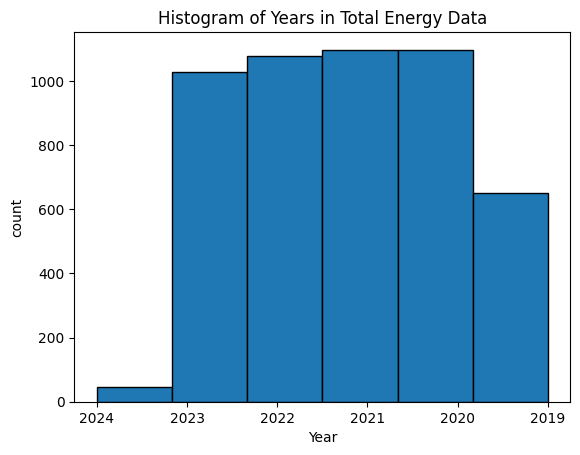

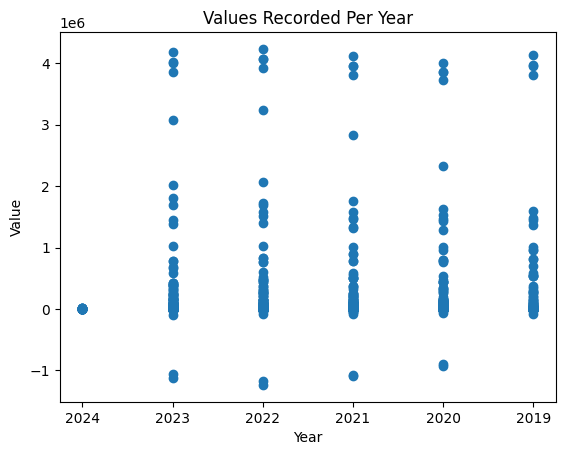

In [52]:
import urllib.request
import json
import pandas as pd

url = 'https://api.eia.gov/v2/total-energy/data/'
apikey = '?api_key=XrJLlHyRab7B5oW072HQhB24H75fafJZ5MdIFlje'
query = '&frequency=annual&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
response = urllib.request.urlopen(url+apikey+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

df = pd.DataFrame(data['response']['data'])
display(df)

import matplotlib.pyplot as plt

plt.hist(df['period'], bins=6, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Histogram of Years in Total Energy Data')
plt.show()

df['value'] = pd.to_numeric(df['value'], errors='coerce')
plt.scatter(x=df['period'], y=df['value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values Recorded Per Year')
plt.show()